In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw
from rdkit.Chem import BondType
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold
import torch
from rdkit.Chem import MACCSkeys, AllChem, Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy 
from rdkit.Chem import AllChem, MACCSkeys
from openbabel import pybel
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Arial"]
import warnings
warnings.filterwarnings('ignore')
from rdkit.Chem import rdchem
pd.set_option('display.max_rows',None)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.layers import Dense, Dropout

In [3]:
data = pd.read_csv('train_mols_properties.csv')

In [4]:
data

SMILES  Mulliken_Charge  \
0       C(C(C(C(F)(F)F)(F)F)(F)F)(C(C(F)(F)F)(F)F)(F)F           -0.133   
1    C12(C(C(C(C(C1(F)F)(F)F)(F)F)(F)F)(C(C(C(C2(F)...           -0.129   
2                                              C[SiH3]           -0.350   
3                                              CCC(C)C           -0.163   
4                                                CCCCC           -0.161   
5                                               CCCCCC           -0.161   
6                                              CCCCCCC           -0.160   
7                                             CCCCCCCC           -0.161   
8                                           CCCCCCCCCC           -0.159   
9                                         CCCCCCCCCCCC           -0.161   
10                                            C1CCCCC1           -0.092   
11                                      C1CCC2CCCCC2C1           -0.093   
12                                         C1=CC=CC=C1           -0.063   
13                                        CC1=CC=CC=C1           -0.169   
14                                     CC1=CC(=CC=C1)C           -0.169   
15                                     CC1=CC=C(C=C1)C           -0.168   
16                                  CC1=CC(=CC(=C1)C)C           -0.169   
17                                      C=CC1=CC=CC=C1           -0.129   
18                                                   O              NaN   
19                                                  CO           -0.293   
20                                                 CCO           -0.298   
21                                                CCCO           -0.299   
22                                              CC(C)O           -0.303   
23                                               CCCCO           -0.299   
24                                             CC(C)CO           -0.300   
25                                             CCC(C)O           -0.304   
26                                           CC(C)(C)O           -0.306   
27                                              CCCCCO           -0.299   
28                                            CC(C)CCO           -0.299   
29                                          CCC(C)(C)O           -0.307   
30                                             CCCCCCO           -0.299   
31                                         C1CCC(CC1)O           -0.301   
32                                           CCCCCCCCO           -0.300   
33                                         CCCCCCCCCCO           -0.300   
34                                     C1=CC=C(C=C1)CO           -0.293   
35                                    C1=CC=C(C=C1)CCO           -0.297   
36                                   C1=CC=C(C=C1)CCCO           -0.299   
37                                               C=CCO           -0.293   
38                                             C(CCl)O           -0.290   
39                                        C(C(F)(F)F)O           -0.285   
40                                 C(C(C(F)(F)F)(F)F)O           -0.286   
41                                              C(CO)O           -0.298   
42                                          C(C(CO)O)O           -0.295   
43                                      C1=CC=C(C=C1)O           -0.297   
44                                     CC1=CC(=CC=C1)O           -0.298   
45                                     CC1=CC=C(C=C1)O           -0.299   
46                                  C1=CC(=CC(=C1)Cl)O           -0.292   
47                                               CCOCC           -0.259   
48                                             CCCOCCC           -0.261   
49                                           CCCCOCCCC           -0.262   
50                                             CCCOCCC           -0.262   
51                                       COC1=CC=CC=C1           -0.261   
52                                      CCOC1=CC=CC=C1           -0.268  

In [5]:
descriptors_list = ['FractionCSP3', 'HallKierAlpha', 'MaxPartialCharge', 'MinPartialCharge',
       'fr_ether', 'MinAbsPartialCharge', 'SMR_VSA6', 'NOCount', 'EState_VSA6',
       'EState_VSA2', 'fr_NH1', 'fr_Ar_N', 'SlogP_VSA3', 'fr_NH0',
       'MaxAbsEStateIndex', 'EState_VSA3', 'PEOE_VSA8', 'fr_C_O_noCOO',
       'EState_VSA8', 'NumHAcceptors', 'VSA_EState8', 'SMR_VSA3', 'MolLogP',
       'VSA_EState2', 'fr_ketone_Topliss', 'fr_nitrile', 'PEOE_VSA6',
       'SMR_VSA5', 'PEOE_VSA10', 'PEOE_VSA1', 'FpDensityMorgan1',
       'VSA_EState6', 'SMR_VSA10']


class additive_feature:
    def __init__(self, smiles):
        self.smiles = smiles

    def MACCS(self):
        mol = Chem.MolFromSmiles(self.smiles)
        if mol is None:
            raise ValueError(f"Cannot create mol object from SMILES: {self.smiles}")
        fp = MACCSkeys.GenMACCSKeys(mol)
        fingerprint = list(int(bit) for bit in fp.ToBitString())
        return np.array(fingerprint).reshape(1, 167)

    def FP2(self):
        fp2 = np.zeros((1, 1024))
        mol = pybel.readstring('smi', self.smiles)
        fp_bits = mol.calcfp().bits
        for i in fp_bits:
            fp2[0][int(i)] = 1
        return fp2

    def ECFP(self):
        mol = Chem.MolFromSmiles(self.smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 6, nBits=2048)
        fingerprint = list(int(bit) for bit in fp.ToBitString())
        return np.array(fingerprint).reshape(1, 2048)

    def descriptors(self):
        mol = Chem.MolFromSmiles(self.smiles)
        descriptors = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors_list)
        result = descriptors.CalcDescriptors(mol)
        return np.array(result)

In [6]:
def process_smiles(smiles, scaler=None, imputer=None, input_descriptors=None):

    if input_descriptors is None:
        descriptors = additive_feature(smiles).descriptors().reshape(1, -1)
        descriptors_2 = data.loc[data['SMILES'] == smiles, ['Mulliken_Charge', 'HOMO Energy (eV)', 'Energy Gap (eV)']].drop_duplicates().iloc[0]
        descriptors_2 = descriptors_2.values.reshape(1, -1)
        descriptors = np.concatenate((descriptors, descriptors_2), axis=1)
    else:
        descriptors = additive_feature(smiles).descriptors().reshape(1, -1)
        descriptors_2 = input_descriptors
        descriptors_2 = descriptors_2.reshape(1, -1)
        descriptors = np.concatenate((descriptors, descriptors_2), axis=1)

    if scaler is not None and imputer is not None:
        descriptors = scaler.transform(descriptors)
        descriptors = imputer.transform(descriptors)

    maccs = additive_feature(smiles).MACCS().flatten()
    return np.concatenate((descriptors.flatten(), maccs))

In [7]:
X_raw = data['SMILES']
y = data['beta'].values

initial_descriptors1 = np.vstack(X_raw.apply(lambda x: additive_feature(x).descriptors().flatten().reshape(1, -1)))
initial_descriptors2 = data[['Mulliken_Charge', 'HOMO Energy (eV)', 'Energy Gap (eV)']].values
print(initial_descriptors1.shape) 
print(initial_descriptors2.shape) 
initial_descriptors= np.hstack((initial_descriptors1, initial_descriptors2))
print(initial_descriptors.shape) 

scaler = StandardScaler().fit(initial_descriptors)
imputer = SimpleImputer(strategy='mean').fit(initial_descriptors)

scaler = StandardScaler().fit(initial_descriptors)
imputer = SimpleImputer(strategy='mean').fit(initial_descriptors)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=150, random_state=45,max_depth=5),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=46),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.05, subsample=0.7, max_depth=5),
    'LightGBM': LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=70,        
    max_depth=12,        
    min_child_samples=10, 
    min_split_gain=0.0,    
    colsample_bytree=1.0, 
    subsample=1.0,        
    subsample_freq=0,    
    random_state=42
),
    'Neural Network' :None
}

(175, 33)
(175, 3)
(175, 36)


In [9]:
print(models)

kf = KFold(n_splits=5, shuffle=True, random_state=76)  #改这个59
results = {name: {'MSE': [], 'MAE': [], 'RMSE': [], 'R2': []} for name in models}
nn_train_loss = []
nn_val_loss = []

# 创建保存模型的文件夹
model_dir = '3_elected_descriptors_model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

{'Linear Regression': LinearRegression(), 'Ridge Regression': Ridge(), 'Random Forest': RandomForestRegressor(max_depth=5, n_estimators=150, random_state=45), 'SVR': SVR(), 'Gradient Boosting': GradientBoostingRegressor(random_state=46), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...), 'LightGBM

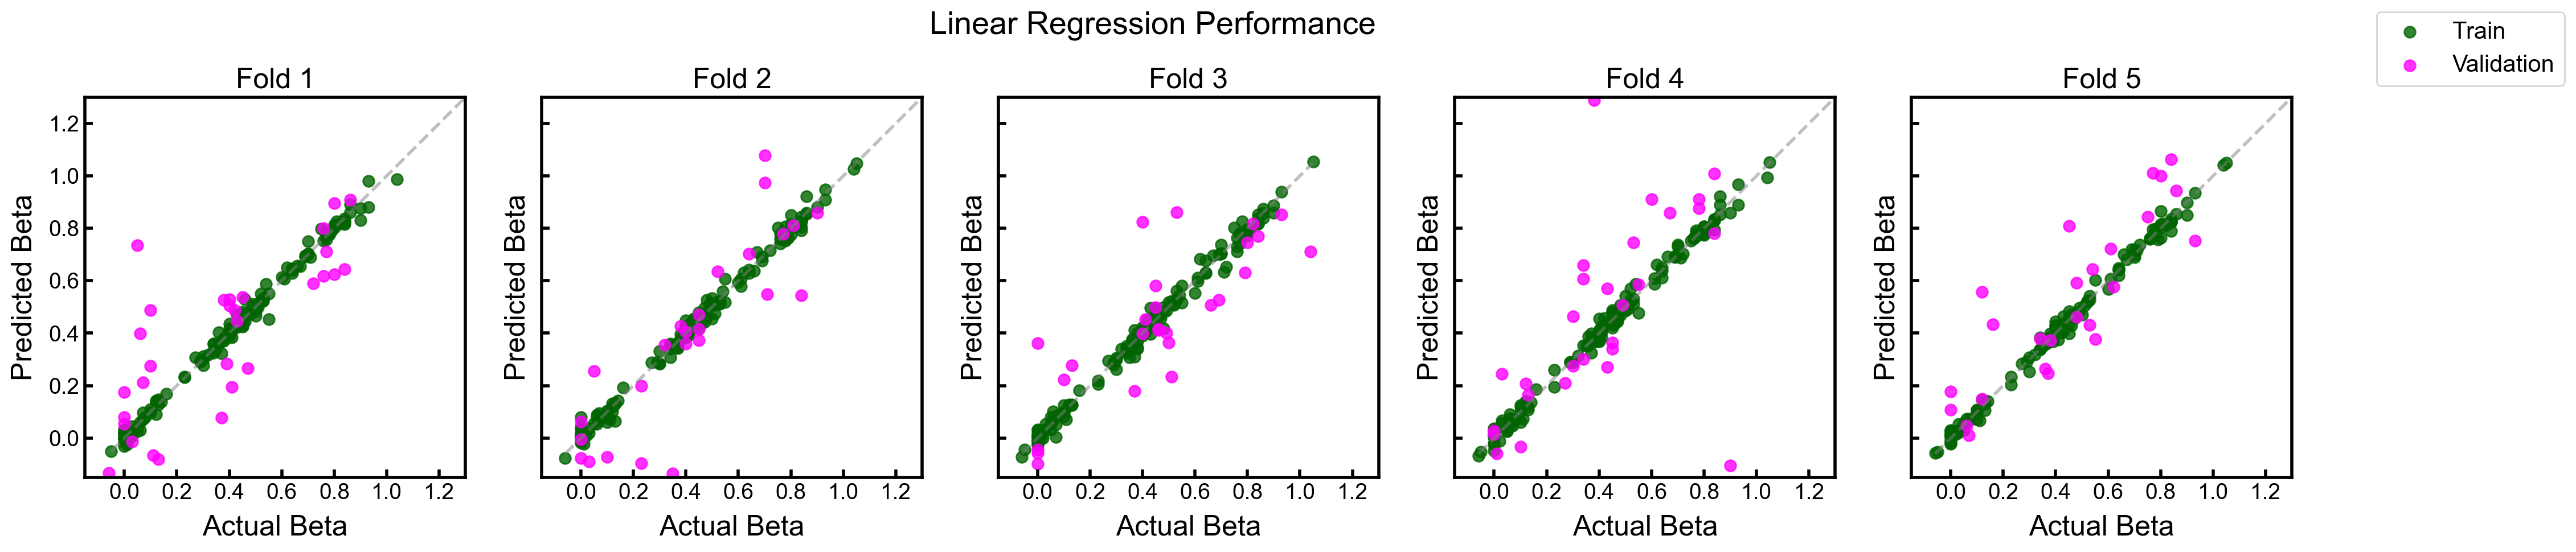

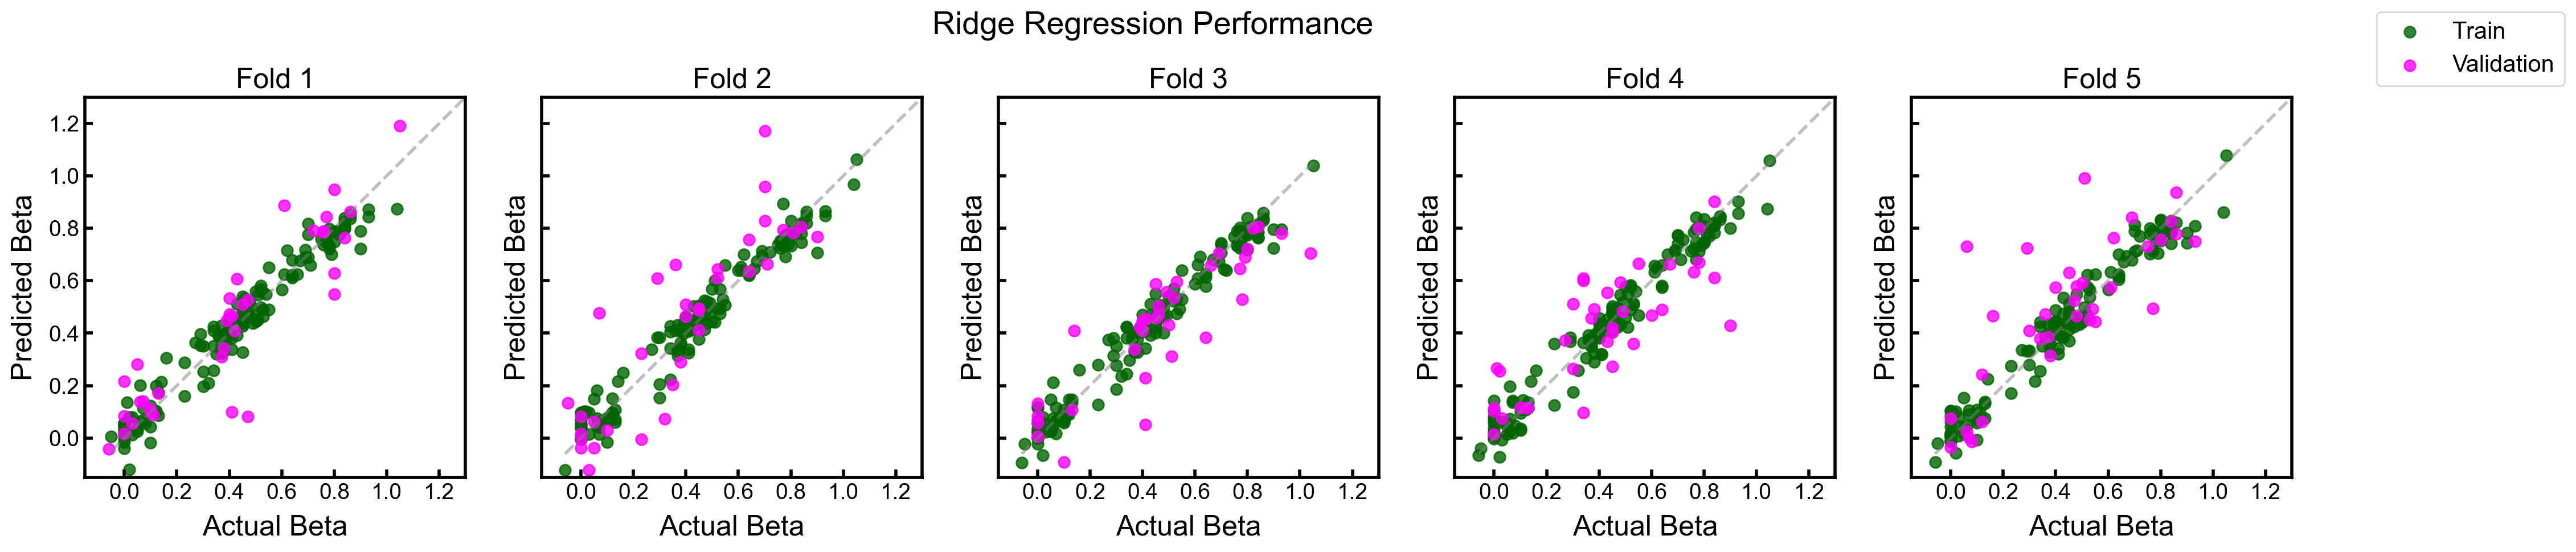

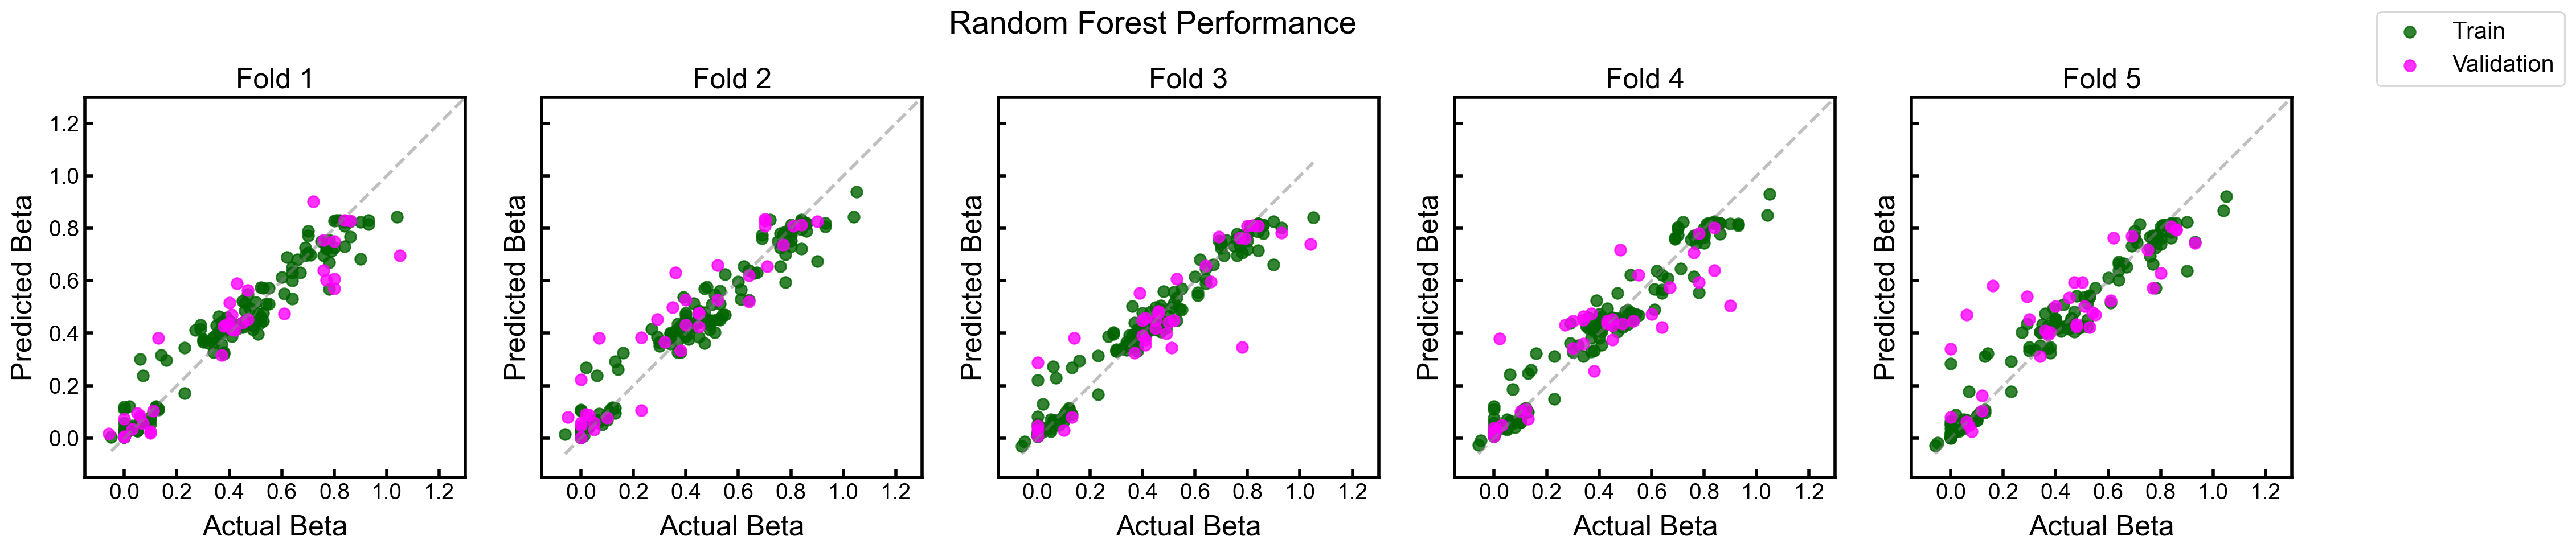

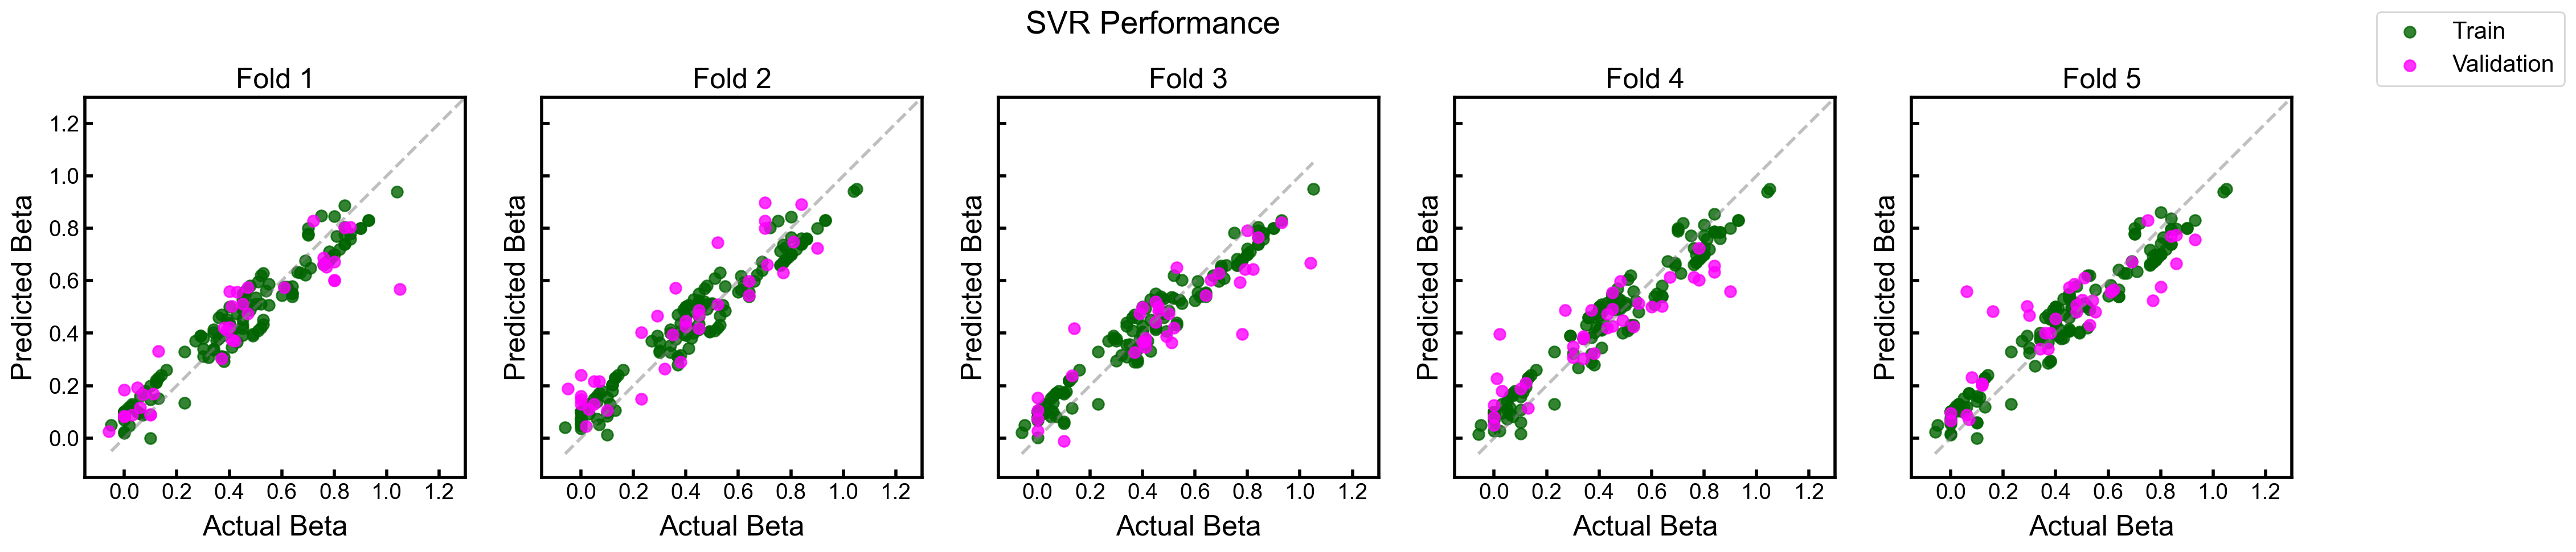

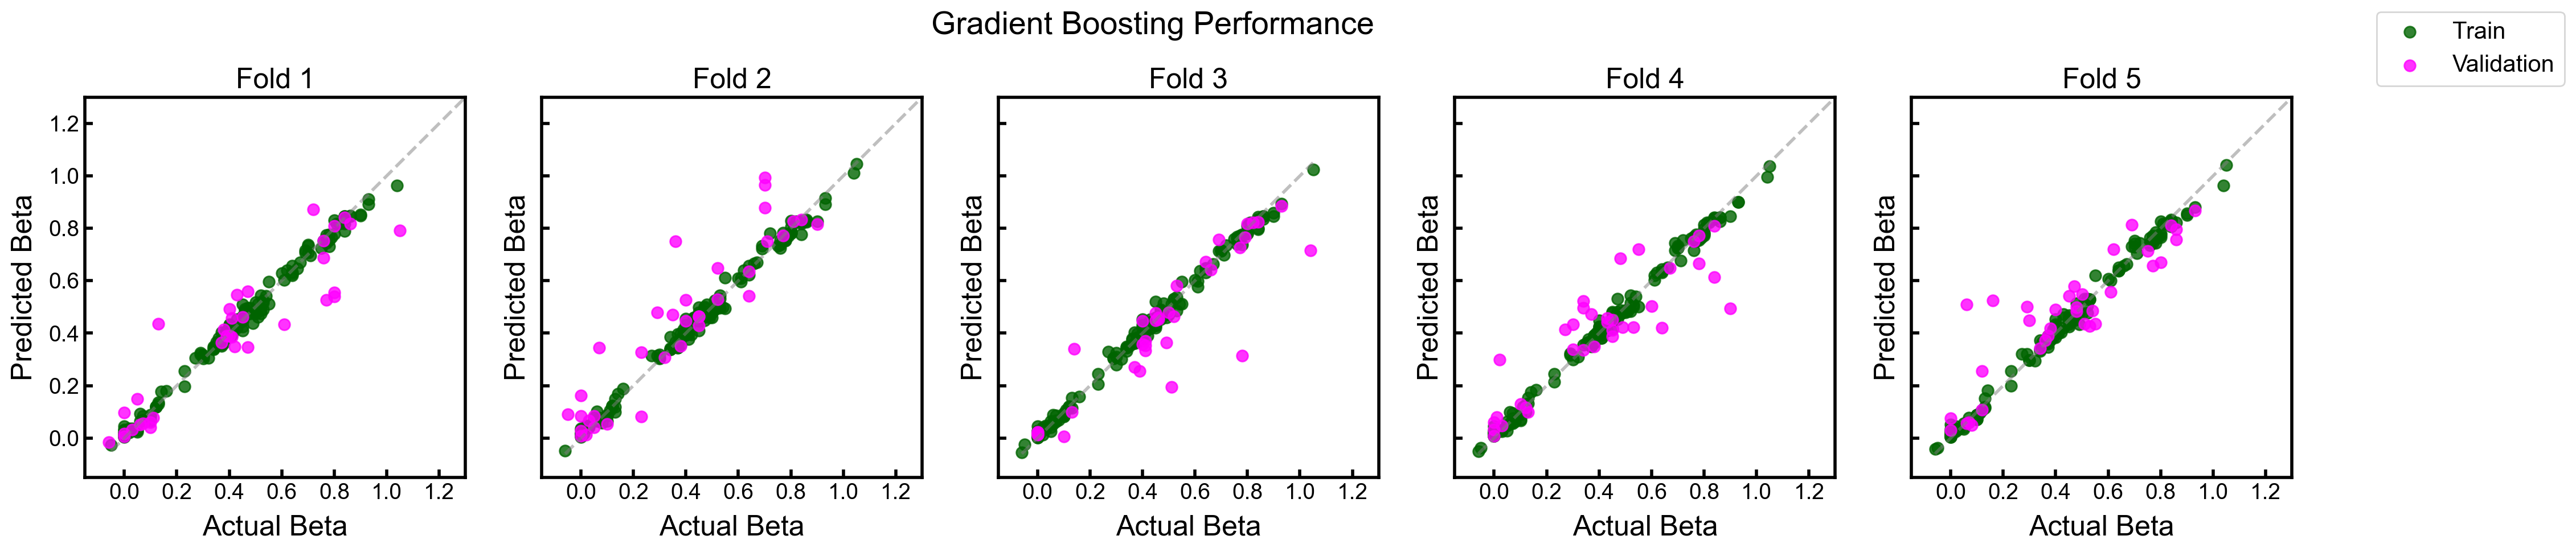

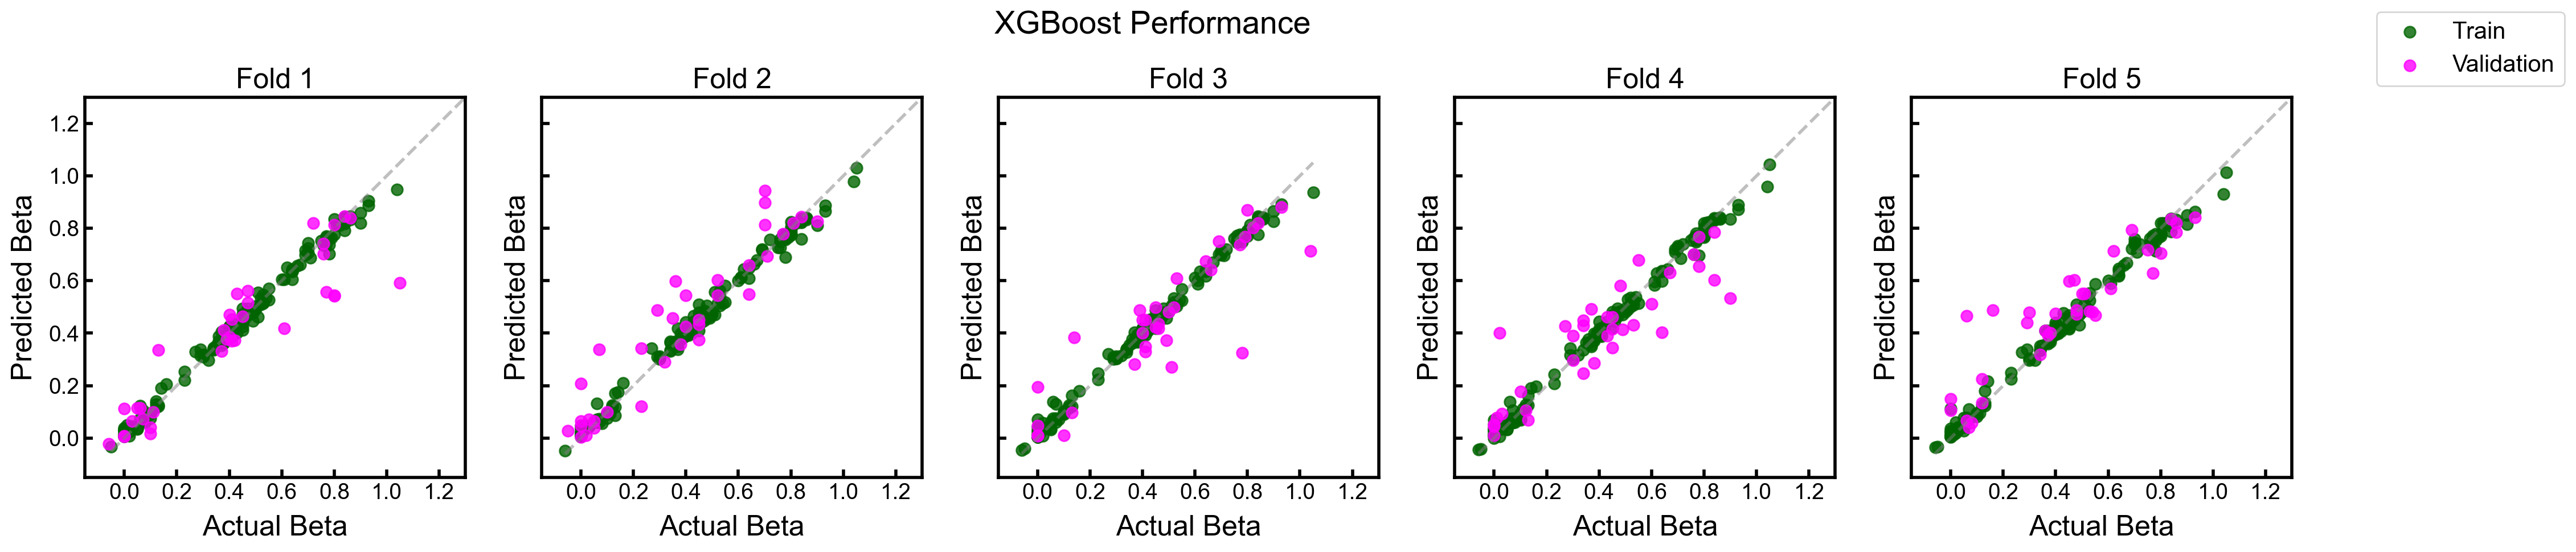

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 84
[LightGBM] [Info] Start training from score 0.430143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

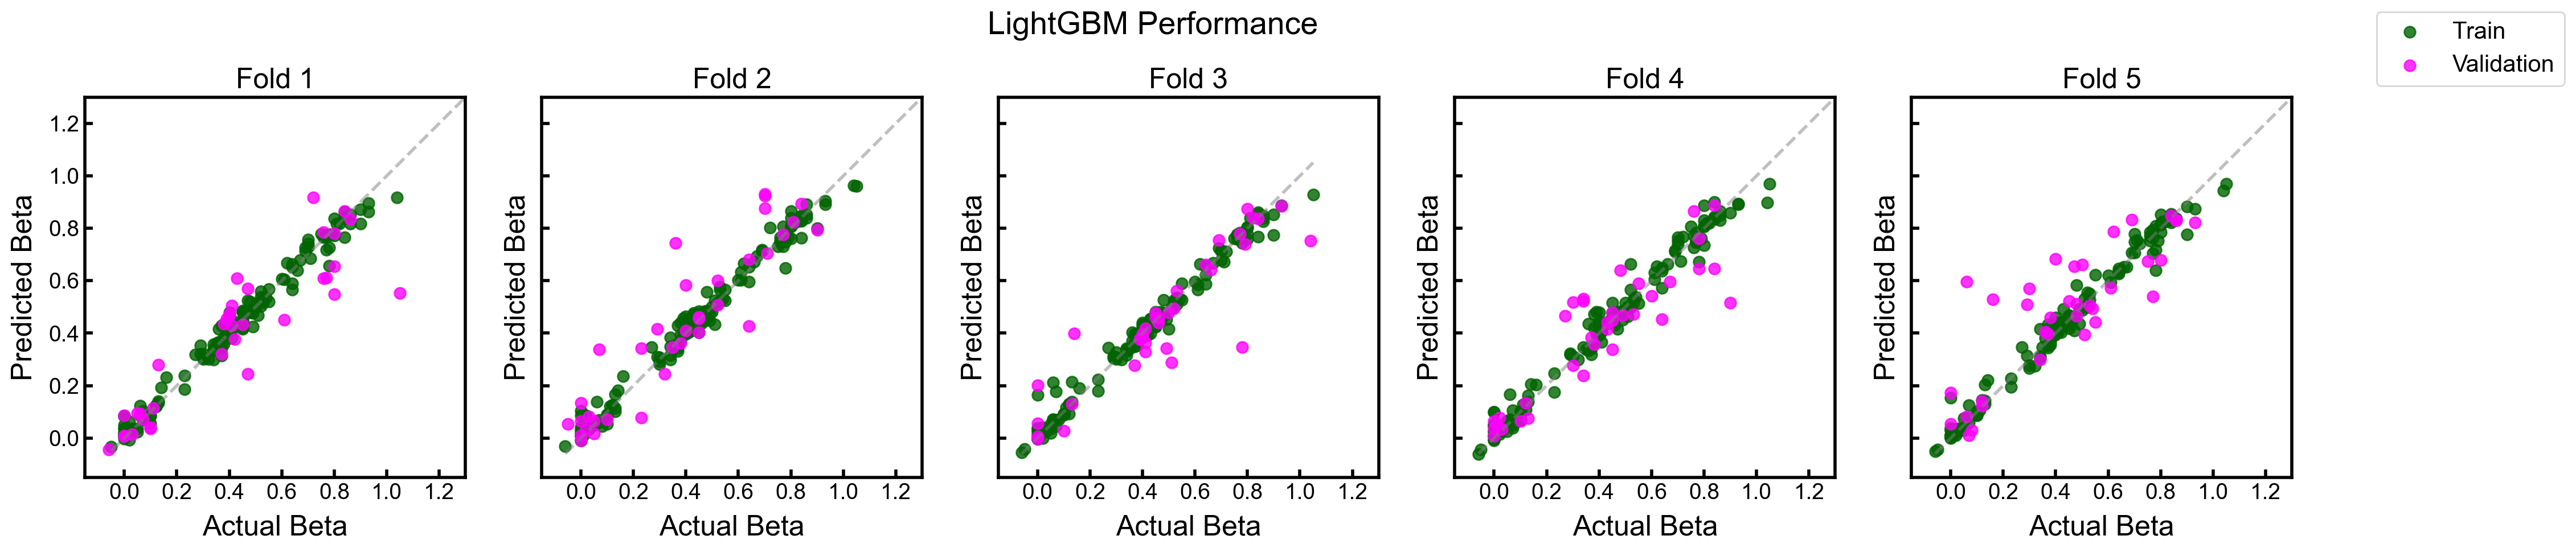

2/2 [==============================] - 0s 2ms/step


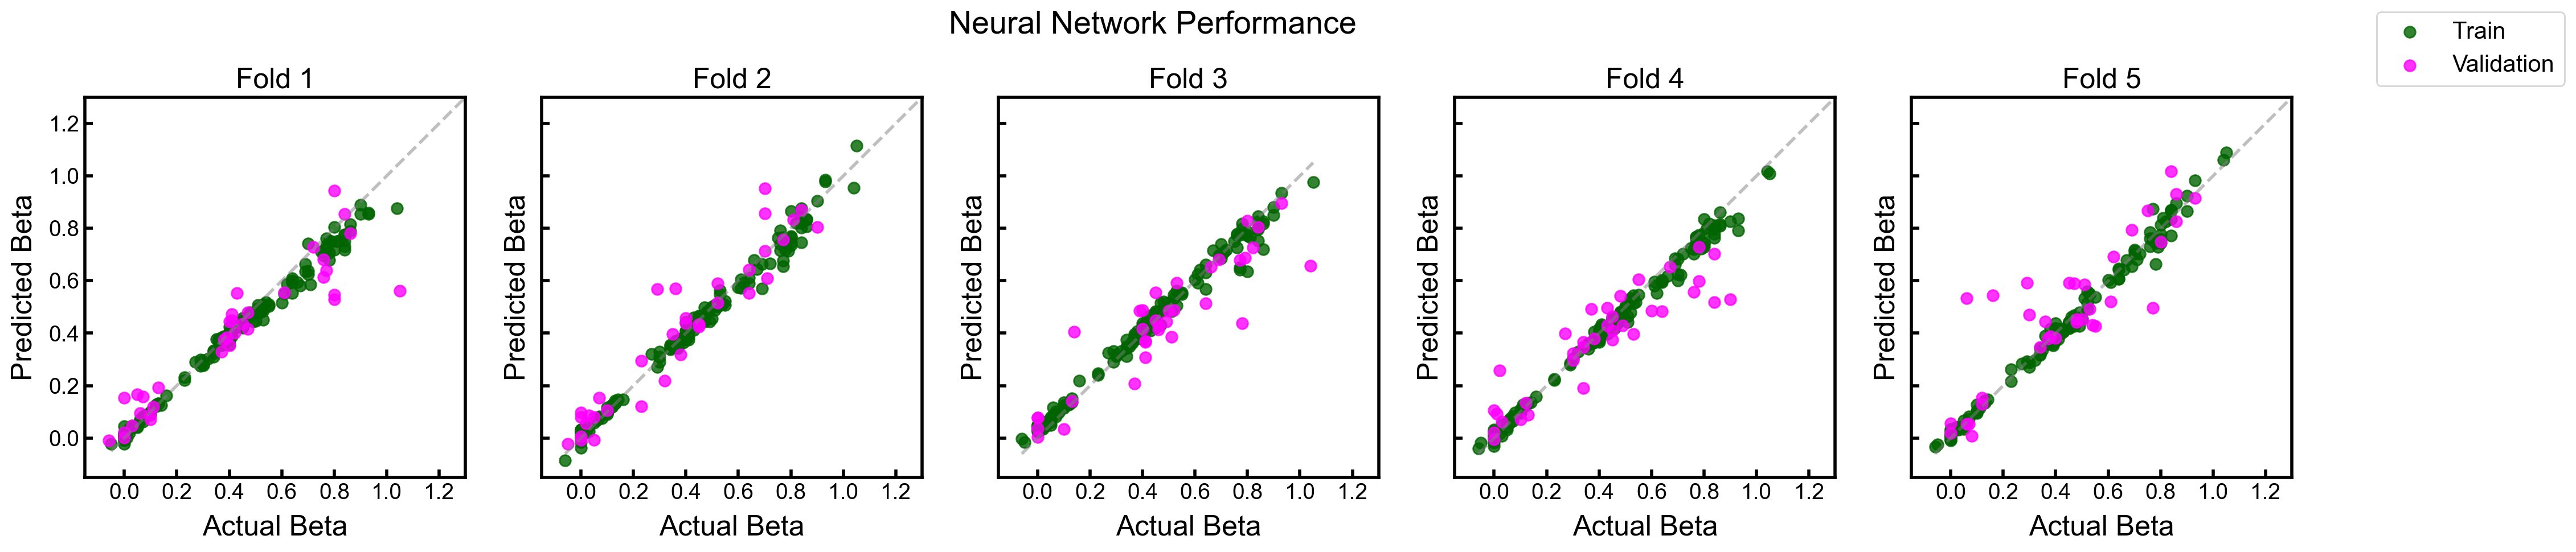

                            MSE           MAE          RMSE            R2
Linear Regression  4.431551e+22  5.872228e+10  1.702779e+11 -5.380470e+23
Ridge Regression   3.140646e-02  1.214224e-01  1.752199e-01  6.232215e-01
Random Forest      1.925850e-02  9.292432e-02  1.369637e-01  7.694104e-01
SVR                2.124513e-02  1.068474e-01  1.442471e-01  7.481779e-01
Gradient Boosting  1.918533e-02  8.856028e-02  1.369482e-01  7.735789e-01
XGBoost            1.751795e-02  8.764722e-02  1.308322e-01  7.937079e-01
LightGBM           2.095716e-02  9.262361e-02  1.429614e-01  7.513606e-01
Neural Network     1.793072e-02  8.617798e-02  1.315873e-01  7.869662e-01


In [10]:
selected_fold = 4 
last_model_name ='XGBoost'   
selected_data = {}  

for name, model in models.items():
    fold = 1
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)  
    for train_index, test_index in kf.split(X_raw):
        X_train_raw, X_test_raw = X_raw.iloc[train_index], X_raw.iloc[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        X_train_cv = np.vstack(X_train_raw.apply(lambda x: process_smiles(x, scaler, imputer)))
        X_test_cv = np.vstack(X_test_raw.apply(lambda x: process_smiles(x, scaler, imputer)))

        if name == 'Neural Network':
            model = Sequential([
                Dense(256, activation='relu', input_dim=X_train_cv.shape[1]),
                Dense(128, activation='relu'),
                Dropout(0.1),
                Dense(64, activation='relu'),
                Dropout(0.1),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            history = model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0, validation_data=(X_test_cv, y_test_cv))
            predictions_train = model.predict(X_train_cv).flatten()
            predictions_test = model.predict(X_test_cv).flatten()
            nn_train_loss.append(history.history['loss'])
            nn_val_loss.append(history.history['val_loss'])

        else:
            model.fit(X_train_cv, y_train_cv)
            predictions_train = model.predict(X_train_cv)
            predictions_test = model.predict(X_test_cv)

        if fold == selected_fold and name == last_model_name:
            selected_data = {
                'y_train_cv': y_train_cv,
                'predictions_train': predictions_train,
                'y_test_cv': y_test_cv,
                'predictions_test': predictions_test
            }

        mse = mean_squared_error(y_test_cv, predictions_test)
        mae = mean_absolute_error(y_test_cv, predictions_test)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_cv, predictions_test)

        results[name]['MSE'].append(mse)
        results[name]['MAE'].append(mae)
        results[name]['RMSE'].append(rmse)
        results[name]['R2'].append(r2)

        axes[fold - 1].scatter(y_train_cv, predictions_train, label='Train', alpha=0.8, c='darkgreen',s=50)
        axes[fold - 1].scatter(y_test_cv, predictions_test, label='Validation', alpha=0.8, c='magenta',s=50)

        axes[fold - 1].plot([y_train_cv.min(), y_train_cv.max()], [y_train_cv.min(), y_train_cv.max()], 'k--', 
                            lw=2, color='grey', alpha=0.5)
        
        axes[fold - 1].set_title(f'Fold {fold}', fontsize=18)
        axes[fold - 1].set_xlabel('Actual Beta', fontsize=18, labelpad=7)
        axes[fold - 1].set_ylabel('Predicted Beta', fontsize=18, labelpad=7)

        axes[fold - 1].set_xlim(-0.15, 1.3)
        axes[fold - 1].set_ylim(-0.15, 1.3)
        axes[fold - 1].set_xticks([ 0, 0.2,0.4,0.6,0.8,1.0,1.2])
        axes[fold - 1].set_yticks([ 0, 0.2,0.4,0.6,0.8,1.0,1.2])
        axes[fold - 1].tick_params(axis='both', which='major', length=5, width=2, direction='in', labelsize=14)

        axes[fold - 1].set_aspect('equal', 'box')

        for spine in axes[fold - 1].spines.values():
            spine.set_linewidth(2)

        fold += 1

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fontsize=15)
    fig.suptitle(f'{name} Performance', fontsize=20)
    plt.show()

average_results = {name: {metric: np.mean(scores) for metric, scores in metrics.items()} for name, metrics in results.items()}

average_results_df = pd.DataFrame.from_dict(average_results, orient='index')
print(average_results_df)

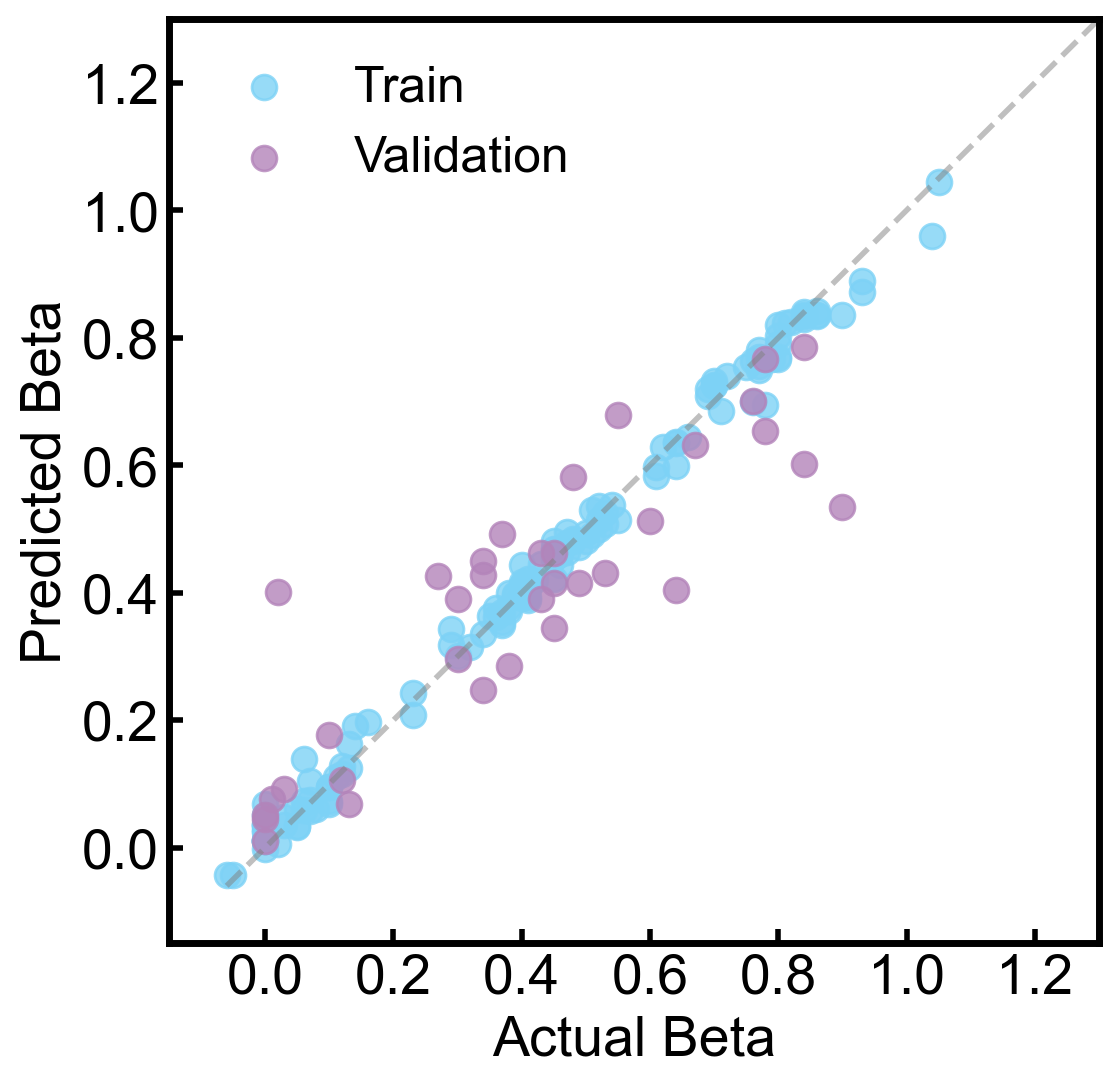

In [21]:
if selected_data:
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(selected_data['y_train_cv'], selected_data['predictions_train'], label='Train', alpha=0.8, s=80,c = '#7dd2f6')
    ax.scatter(selected_data['y_test_cv'], selected_data['predictions_test'], label='Validation', alpha=0.8, s=80, c='#b384ba')
    ax.plot([selected_data['y_train_cv'].min(), selected_data['y_train_cv'].max()], [selected_data['y_train_cv'].min(), selected_data['y_train_cv'].max()], 'k--', lw=2, color='grey', alpha=0.5)

    ax.set_xlabel('Actual Beta', fontsize=20)
    ax.set_ylabel('Predicted Beta', fontsize=20)
    ax.tick_params(axis='both', which='major', length=5, width=2, direction='in', labelsize=20)
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    ax.set_xlim(-0.15, 1.3)
    ax.set_ylim(-0.15, 1.3)
    ax.set_xticks([ 0, 0.2,0.4,0.6,0.8,1.0,1.2])
    ax.set_yticks([ 0, 0.2,0.4,0.6,0.8,1.0,1.2])
    ax.tick_params(axis='both', which='major', length=5, width=2, direction='in', labelsize=20)   

    ax.legend(loc='upper left', fontsize=18 , frameon = False) 

    plt.show()